## Continuing with inmuebles_bogota.csv file

In [51]:
import pandas as pd
import numpy as np

Importing data

In [52]:
data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\inmuebles_bogota.csv")

Writing a better name for columns just to not have future troubles 

In [53]:
data=data.rename(columns={"Área":"Area","Baños":"Banos"})

In [54]:
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


We can clearly see that "Valor" has an object type and we wanted with an "int" type

In [56]:
data.Valor.str.split() # we can apply string functions because is an object type. It returns a Series data with list
data.Valor.str.split(expand=True) #expand returns a new dataframe with the entrances of the list
# Check series.atributes for more info

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


Save the column of the number (which still is a object type)

In [57]:
data["cost_millions"]=data.Valor.str.split(expand=True)[1]
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.000.000


We need to erase the "." in the numbers

In [58]:
data.cost_millions=data.cost_millions.str.replace(".","",regex=True) # regex is to verify is a regular expression is written
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tipo           9520 non-null   object
 1   Descripcion    9520 non-null   object
 2   Habitaciones   9520 non-null   int64 
 3   Banos          9520 non-null   int64 
 4   Area           9520 non-null   int64 
 5   Barrio         9520 non-null   object
 6   UPZ            9478 non-null   object
 7   Valor          9520 non-null   object
 8   cost_millions  9520 non-null   object
dtypes: int64(3), object(6)
memory usage: 669.5+ KB


We change the cost_millions column type from object to float value

In [60]:
data.cost_millions=data.cost_millions.astype("float")/1000000
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


In [108]:
data.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
3248,Apartamento,Apartamento en venta en Engativa,4,2,95,Engativa,Engativá,$ 390.000.000,390.00
4337,Casa,Casa en venta en Zona Noroccidental,3,2,61,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 253.100.000,253.10
9160,Apartamento,Apartamento en venta en Engativa,3,2,67,Engativa,Engativá,$ 253.000.000,253.00
8211,Casa,Casa en venta en Engativa,3,2,82,Engativa,Engativá,$ 330.000.000,330.00
7245,Apartamento,Apartamento en venta en Cedritos,2,2,60,Cedritos,Usaquén,$ 270.000.000,270.00
3221,Apartamento,Apartamento en venta en Zona Noroccidental,2,2,65,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 325.000.000,325.00
8697,Apartamento,Apartamento en venta en Santa Fe,1,1,40,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 320.000.000,320.00
1886,Apartamento,Apartamento en venta en Barrios Unidos,2,2,84,Barrios Unidos,Los Andes,$ 288.000.000,288.00
6876,Apartamento,Apartamento en venta en Suba,3,2,111,Suba,Suba,$ 500.000.000,500.00
7098,Apartamento,Apartamento en venta en Bosa,2,1,36,Bosa,Bosa Central,$ 98.000.000,98.00


### Cambiar el número de decimales que se muestran en el df

In [63]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format",lambda x: "%.2f" %x)
data.describe()

,Habitaciones,Banos,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


## Strange Data

In [65]:
data[data.Habitaciones == data.Habitaciones.max()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,480.00


In [66]:
data.loc[data.Banos == data.Banos.min()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,9200.00
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000,1000.00
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000,800.00


In [67]:
data[data.Area == data.Area.min()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180.00


<Axes: ylabel='Frequency'>

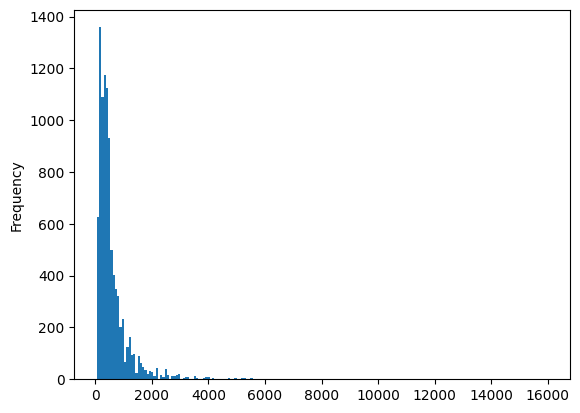

In [71]:
data.cost_millions.plot.hist(bins=200) #bins = number of classes of the histogram

# Data visualization with Seaborn and Matplotlib

Seaborn is matplotlib based. It creates better plots than Matplotlib.
Using both libraries we can create great plots and figures.

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

First we create a figure where we will make our graphic

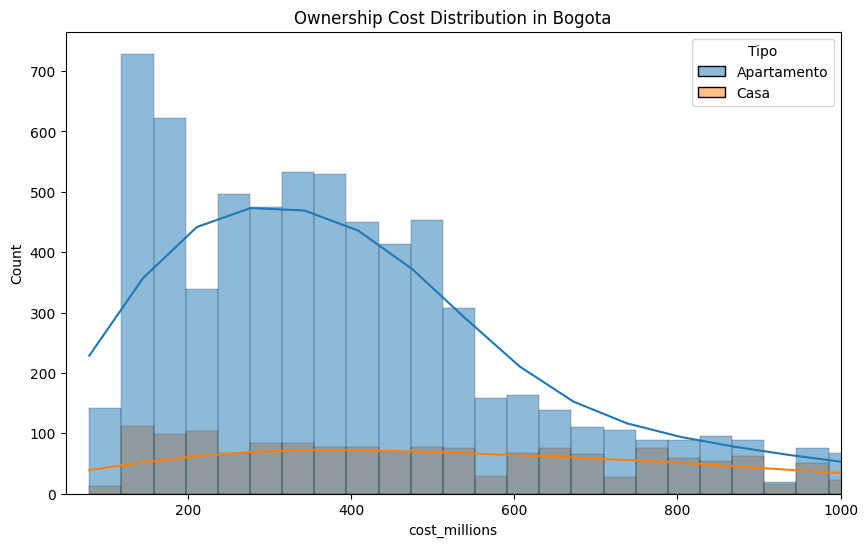

In [109]:
plt.figure(figsize=(10,6)) # create ploting space (width, height)
subset=data[(data.Tipo == "Casa") | (data.Tipo == "Apartamento")]
subset.head()
graph=sns.histplot(data=subset, x= "cost_millions", kde=True,hue="Tipo") # kde = kernel density estimate
#hue = divide x data into different categories that exist in an especific column 
graph.set_title("Ownership Cost Distribution in Bogota") # set title
plt.xlim((50,1000)) #set x range
#plt.ylim((0,5))
# plt.savefig("cost_distribution.png", format = "png") #if we want to save it in another folder, write folder's path
plt.show()